In [1]:
import pandas as pd

In [35]:
df=pd.read_csv("07-hw-animals.csv")

In [36]:
!pip install matplotlib

In [67]:
import matplotlib.pyplot as plt

In [68]:
%matplotlib inline

In [69]:
df

,animal,name,length,inches
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716535
2,dog,Egglesburg,65,25.590551
3,dog,Devon,50,19.685039
4,cat,Charlie,32,12.598425
5,dog,Fontaine,35,13.779528


In [70]:
df.columns

Index(['animal', 'name', 'length', 'inches'], dtype='object')

### display the first three animals

In [71]:
columns_to_show = ['animal','name','length']
df[columns_to_show][0:3]

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


### Sort the animals to see the 3 longest animals

In [72]:
df.sort_values(by='length', ascending=False).head(3) #sort_values, not sort, and sort by length column

,animal,name,length,inches
2,dog,Egglesburg,65,25.590551
3,dog,Devon,50,19.685039
1,cat,Bob,45,17.716535


### What are the counts of the different values of the "animal" column? a.k.a. how many cats and how many dogs

In [73]:
df['animal'].value_counts() #value_counts()

dog    3
cat    3
Name: animal, dtype: int64

### Only select the dogs

In [74]:
is_dog = df['animal']=='dog'

In [75]:
df[df['animal'] == 'dog'] #df['animal]==dog will only give a list of true or false, if you want the rows back, you have to put a df[] to put the is_dog into a data frame 

,animal,name,length,inches
2,dog,Egglesburg,65,25.590551
3,dog,Devon,50,19.685039
5,dog,Fontaine,35,13.779528


### Display all of the animals that are greater than 40 cm

In [76]:
df[df['length'] > 40]

,animal,name,length,inches
1,cat,Bob,45,17.716535
2,dog,Egglesburg,65,25.590551
3,dog,Devon,50,19.685039


### 'length' is the animal's length in cm. Create a new column called inches that is the length in inches

In [77]:
df['inches']=df['length']/2.54
df

,animal,name,length,inches
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716535
2,dog,Egglesburg,65,25.590551
3,dog,Devon,50,19.685039
4,cat,Charlie,32,12.598425
5,dog,Fontaine,35,13.779528


### Save the cats to a separate variable called "cats." Save the dogs to a separate variable called "dogs."

In [78]:
dogs=df['animal'] == 'dog'
cats=df['animal'] == 'cat'

### Display all of the animals that are cats and above 12 inches long. First do it using the "cats" variable, then do it using your normal dataframe.

In [79]:
df[(df['animal'] =='cat') & (df['inches']>12)] #panda only recognizes the conditions in parentaces


,animal,name,length,inches
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716535
4,cat,Charlie,32,12.598425


### What's the mean length of a cat?

In [80]:
df[cats].describe()
#the mean length of a cat is 37.33333

,length,inches
count,3.000000,3.000000
mean,37.333333,14.698163
std,6.806859,2.679866
min,32.000000,12.598425
25%,33.500000,13.188976
50%,35.000000,13.779528
75%,40.000000,15.748031
max,45.000000,17.716535


### What's the mean length of a dog?

In [81]:
df[dogs].describe()
# the mean length of a dog is 50inches

,length,inches
count,3.0,3.000000
mean,50.0,19.685039
std,15.0,5.905512
min,35.0,13.779528
25%,42.5,16.732283
50%,50.0,19.685039
75%,57.5,22.637795
max,65.0,25.590551


### Use groupby to accomplish both of the above tasks at once.

In [82]:
df.groupby([cats,dogs]).describe()

length     inches
animal animal                            
False  True   count   3.000000   3.000000
              mean   50.000000  19.685039
              std    15.000000   5.905512
              min    35.000000  13.779528
              25%    42.500000  16.732283
              50%    50.000000  19.685039
              75%    57.500000  22.637795
              max    65.000000  25.590551
True   False  count   3.000000   3.000000
              mean   37.333333  14.698163
              std     6.806859   2.679866
              min    32.000000  12.598425
              25%    33.500000  13.188976
              50%    35.000000  13.779528
              75%    40.000000  15.748031
              max    45.000000  17.716535

### Make a histogram of the length of dogs. I apologize that it is so boring

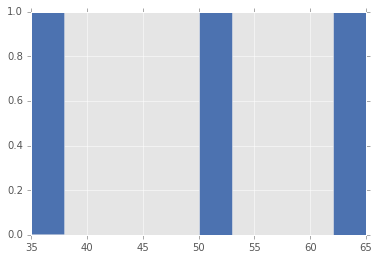

In [94]:
new_dog_data = df[df['animal'] == 'dog']
new_dog_data['length'].hist()

### Change your graphing style to be something else (anything else!)

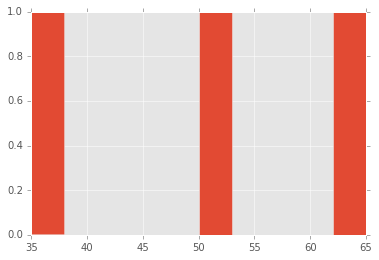

In [95]:
plt.style.use('ggplot')
new_dog_data['length'].hist()

### Make a horizontal bar graph of the length of the animals, with their name as the label (look at the billionaires notebook I put on Slack!)


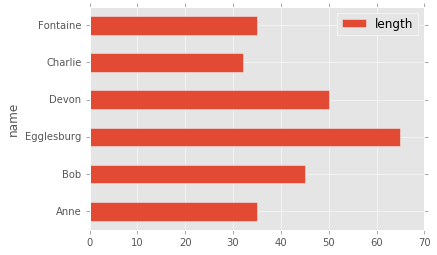

In [100]:
df.plot(kind='barh', x='name',y='length') #length='false' remove the length #barh: a hornizontal bar chat

### Make a sorted horizontal bar graph of the cats, with the larger cats on top

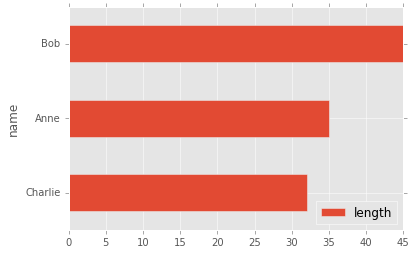

In [103]:
df[df['animal']== 'cat'].sort_values(by='length').plot(kind='barh', x='name', y='length')